In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicLight') # For Windows
print(plt.rcParams['font.family'])
import json  
import cv2
import numpy as np

['NanumGothicLight']


In [2]:
plt.rc('font', family='NanumGothicLight') # For Windows
print(plt.rcParams['font.family'])

['NanumGothicLight']


In [27]:
def show_img(data, path, face):    
    img_array = np.fromfile(path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    # img = cv2.imread(path, cv2.IMREAD_COLOR)    
    drawing_image = img.copy()
    plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.savefig('../data/image_analysis/imagesave/'+face+'facepic.jpg', facecolor='#ffffff', bbox_inches='tight')
    plt.show()

In [22]:
def show_flow(emo, order, face):
    plt.rc('ytick', labelsize=17)  # y축 눈금 폰트 크기
    plt.rc('xtick', labelsize=17)  # x축 눈금 폰트 크기 
    plt.rc('legend', fontsize=17)  # 범례 폰트 크기
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(len(emotion[emo]), 1, figsize = (20,20))
    # plt.suptitle(face)
    for idx in range(len(emotion[emo])):
        target_list = [i[0].replace('-',' - ') + " -> " + i[1].replace('-', ' - ') for i in emotion[emo][idx]['landmark_pair']]
        temp_plot = sns.lineplot(data = df[target_list], markers=False, dashes=False, ax=ax[idx], palette="tab10")        
        ax[idx].axvline(order, 0, 1, color='red', linestyle='--', linewidth=2)
        temp_plot.set_title(emotion[emo][idx]['name'], fontsize=30)
    plt.savefig('../data/image_analysis/imagesave/'+face+'.jpg', facecolor='#ffffff', bbox_inches='tight')
    plt.show()

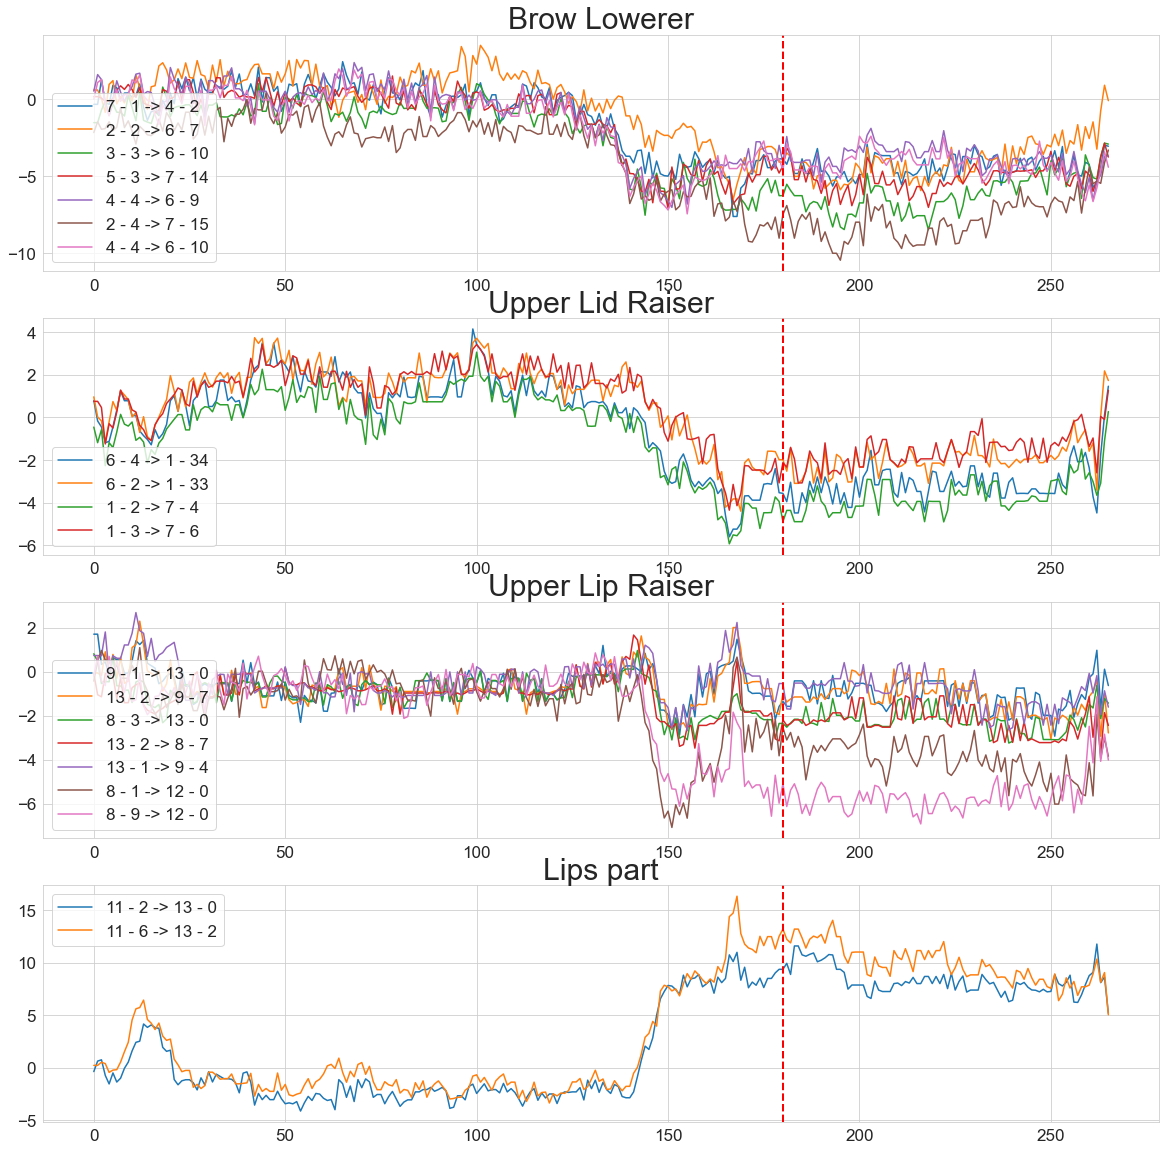

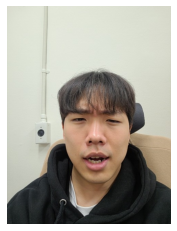

{'7 - 1 -> 4 - 2': -3.86, '2 - 2 -> 6 - 7': -4.07, '3 - 3 -> 6 - 10': -6.25, '5 - 3 -> 7 - 14': -4.31, '4 - 4 -> 6 - 9': -4.09, '2 - 4 -> 7 - 15': -7.47, '4 - 4 -> 6 - 10': -4.58, '6 - 4 -> 1 - 34': -3.57, '6 - 2 -> 1 - 33': -1.99, '1 - 2 -> 7 - 4': -4.9, '1 - 3 -> 7 - 6': -2.13, '9 - 1 -> 13 - 0': -1.35, '13 - 2 -> 9 - 7': -1.0, '8 - 3 -> 13 - 0': -2.35, '13 - 2 -> 8 - 7': -2.19, '13 - 1 -> 9 - 4': -0.54, '8 - 1 -> 12 - 0': -2.54, '8 - 9 -> 12 - 0': -5.09, '11 - 2 -> 13 - 0': 9.38, '11 - 6 -> 13 - 2': 13.22}


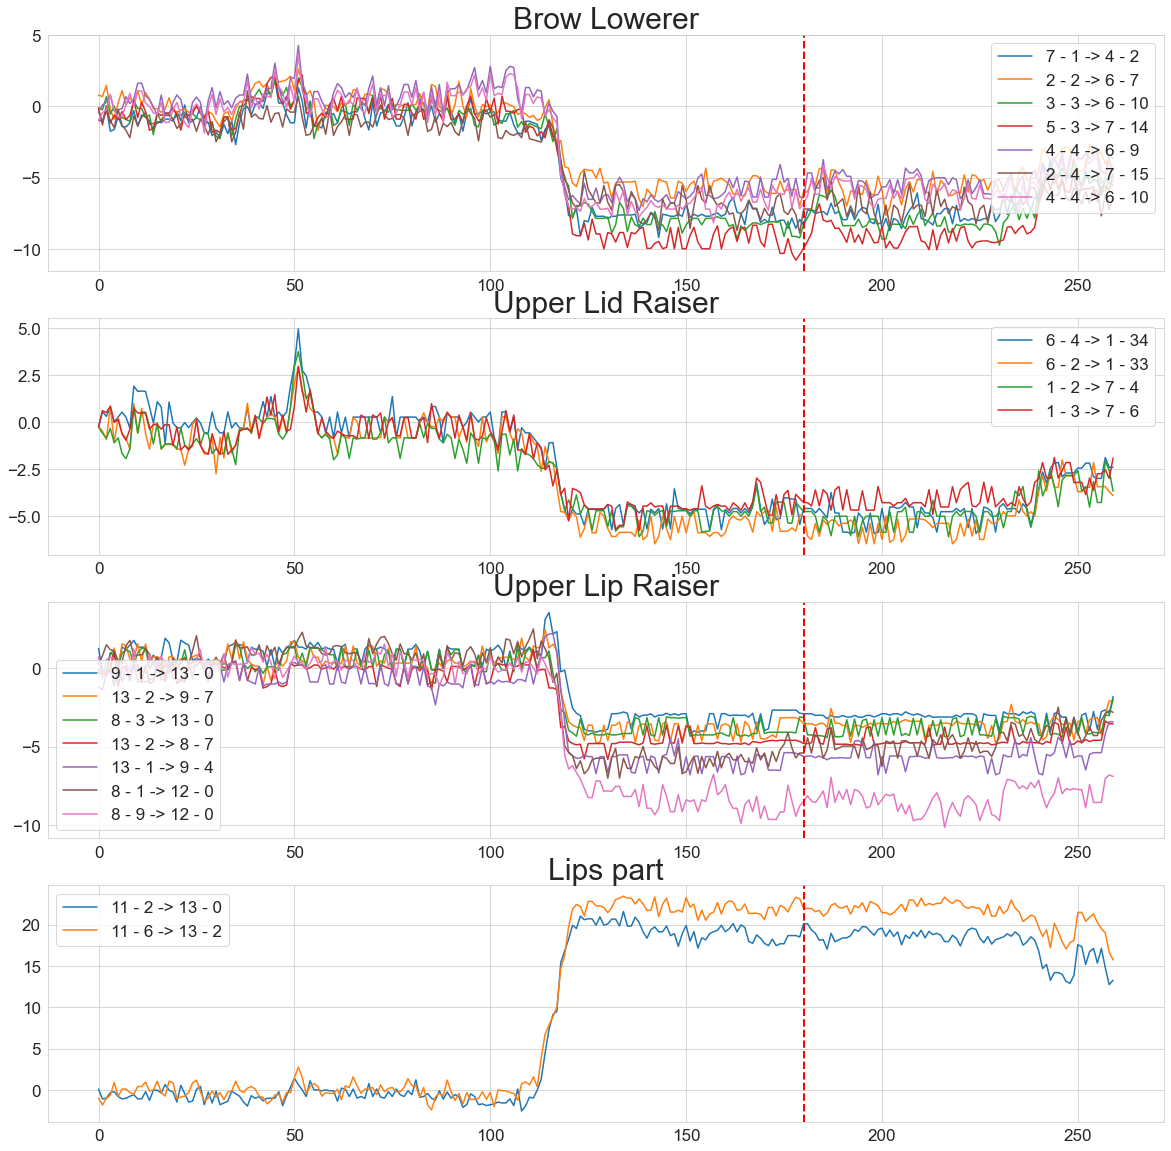

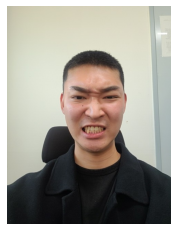

{'7 - 1 -> 4 - 2': -8.32, '2 - 2 -> 6 - 7': -6.0, '3 - 3 -> 6 - 10': -8.27, '5 - 3 -> 7 - 14': -9.94, '4 - 4 -> 6 - 9': -6.4, '2 - 4 -> 7 - 15': -7.19, '4 - 4 -> 6 - 10': -6.76, '6 - 4 -> 1 - 34': -4.59, '6 - 2 -> 1 - 33': -4.98, '1 - 2 -> 7 - 4': -4.76, '1 - 3 -> 7 - 6': -4.28, '9 - 1 -> 13 - 0': -2.9, '13 - 2 -> 9 - 7': -3.54, '8 - 3 -> 13 - 0': -3.15, '13 - 2 -> 8 - 7': -4.8, '13 - 1 -> 9 - 4': -5.63, '8 - 1 -> 12 - 0': -5.4, '8 - 9 -> 12 - 0': -8.47, '11 - 2 -> 13 - 0': 20.11, '11 - 6 -> 13 - 2': 21.96}


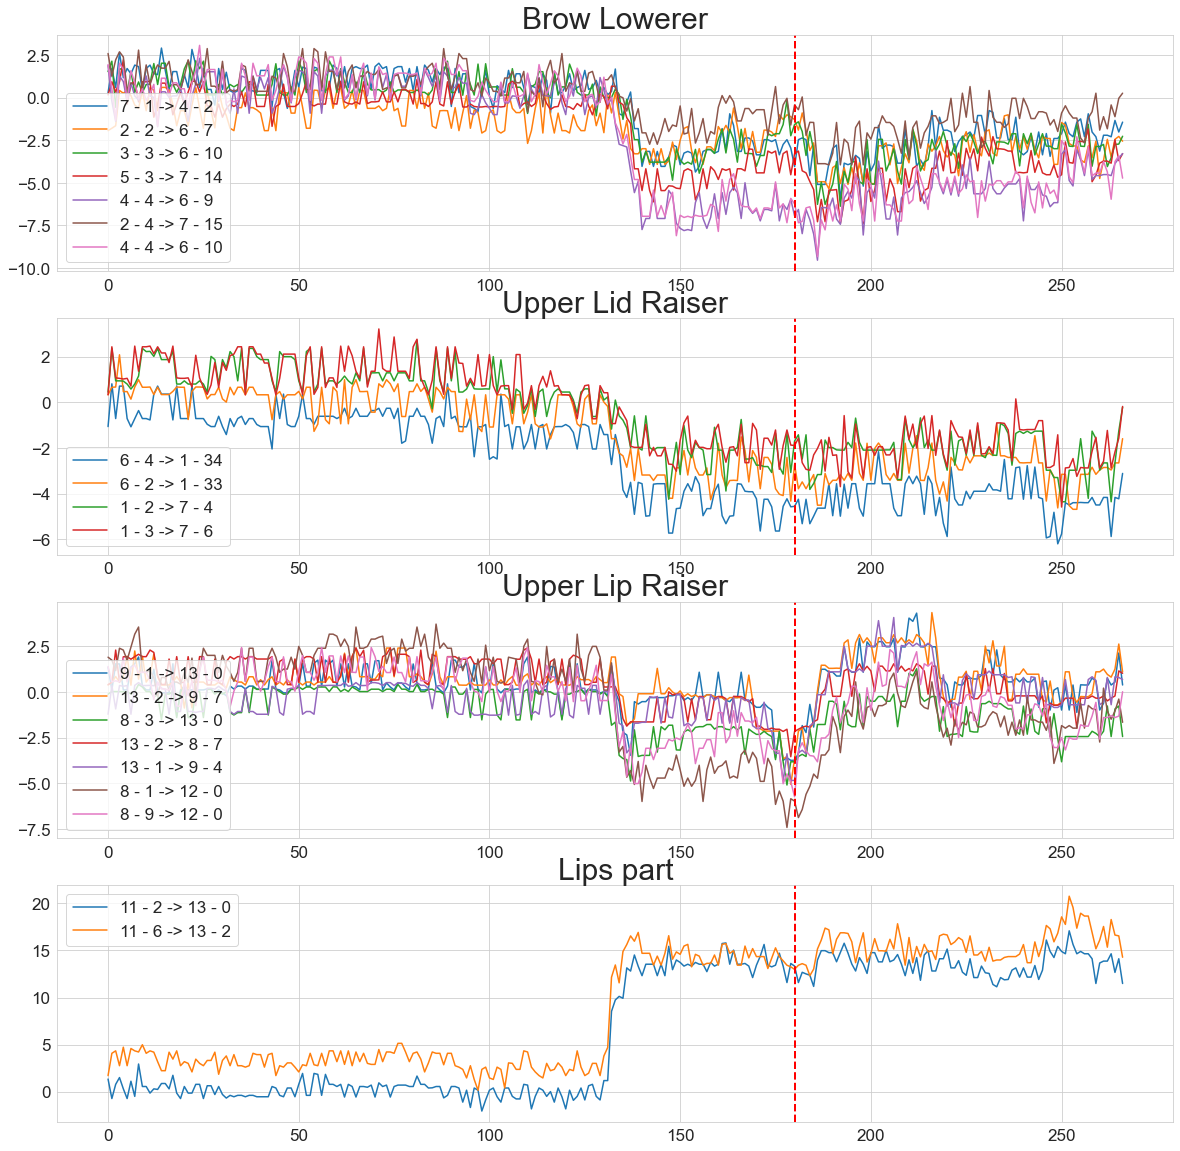

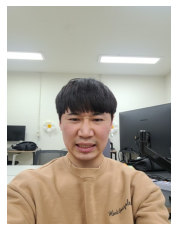

{'7 - 1 -> 4 - 2': -4.04, '2 - 2 -> 6 - 7': -1.28, '3 - 3 -> 6 - 10': -1.57, '5 - 3 -> 7 - 14': -3.28, '4 - 4 -> 6 - 9': -6.94, '2 - 4 -> 7 - 15': -0.42, '4 - 4 -> 6 - 10': -6.23, '6 - 4 -> 1 - 34': -4.55, '6 - 2 -> 1 - 33': -2.72, '1 - 2 -> 7 - 4': -1.69, '1 - 3 -> 7 - 6': -1.89, '9 - 1 -> 13 - 0': -3.74, '13 - 2 -> 9 - 7': -3.67, '8 - 3 -> 13 - 0': -3.82, '13 - 2 -> 8 - 7': -2.16, '13 - 1 -> 9 - 4': -4.84, '8 - 1 -> 12 - 0': -5.97, '8 - 9 -> 12 - 0': -5.73, '11 - 2 -> 13 - 0': 13.34, '11 - 6 -> 13 - 2': 12.99}


In [39]:
# Happy, Sadness, Surprise, Anger
people_list = ['규', '현수님', '희태']
emo_kr = '화남'
emo = 'Anger'
image_order = 180

for fa in people_list:
    face = fa + emo_kr
    df = pd.read_csv('../data/image_analysis/'+face+'/'+face+'.csv')
    with open('../data/image_analysis/emotion_rule.json', 'r') as f:
        emotion = json.load(f)
    show_flow(emo, image_order, face)
    show_img(df, '../data/image_analysis/'+face+'/' + str(image_order) + '.jpg', face)
    print(pd.DataFrame(df.iloc[image_order]).to_dict()[image_order])